In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Step 1: Read the edgelist data into a Pandas DataFrame-
df = pd.read_csv("/content/drive/MyDrive/twitter_combined.txt", delim_whitespace=True,names = ['start','end'],skiprows=990000)

In [ ]:
df

,start,end
0,375710523,322687731
1,273508691,40981798
2,371743964,107701687
3,164811132,92319025
4,306770757,301730320
...,...,...
9995,317967511,360245938
9996,201526384,276706356
9997,46759611,123715869
9998,134301914,27633075


The from_pandas_edgelist function is a part of the NetworkX library in Python, which is a powerful tool for working with graphs and networks. This function is specifically used to create a graph object from a pandas DataFrame that represents an edge list.

df: The input pandas DataFrame containing the edge list data.

source: The name of the DataFrame column specifying the source nodes of the edges.

target: The name of the DataFrame column specifying the target nodes of the edges.

In [ ]:
GRAPH = nx.from_pandas_edgelist(df, source='start', target='end')

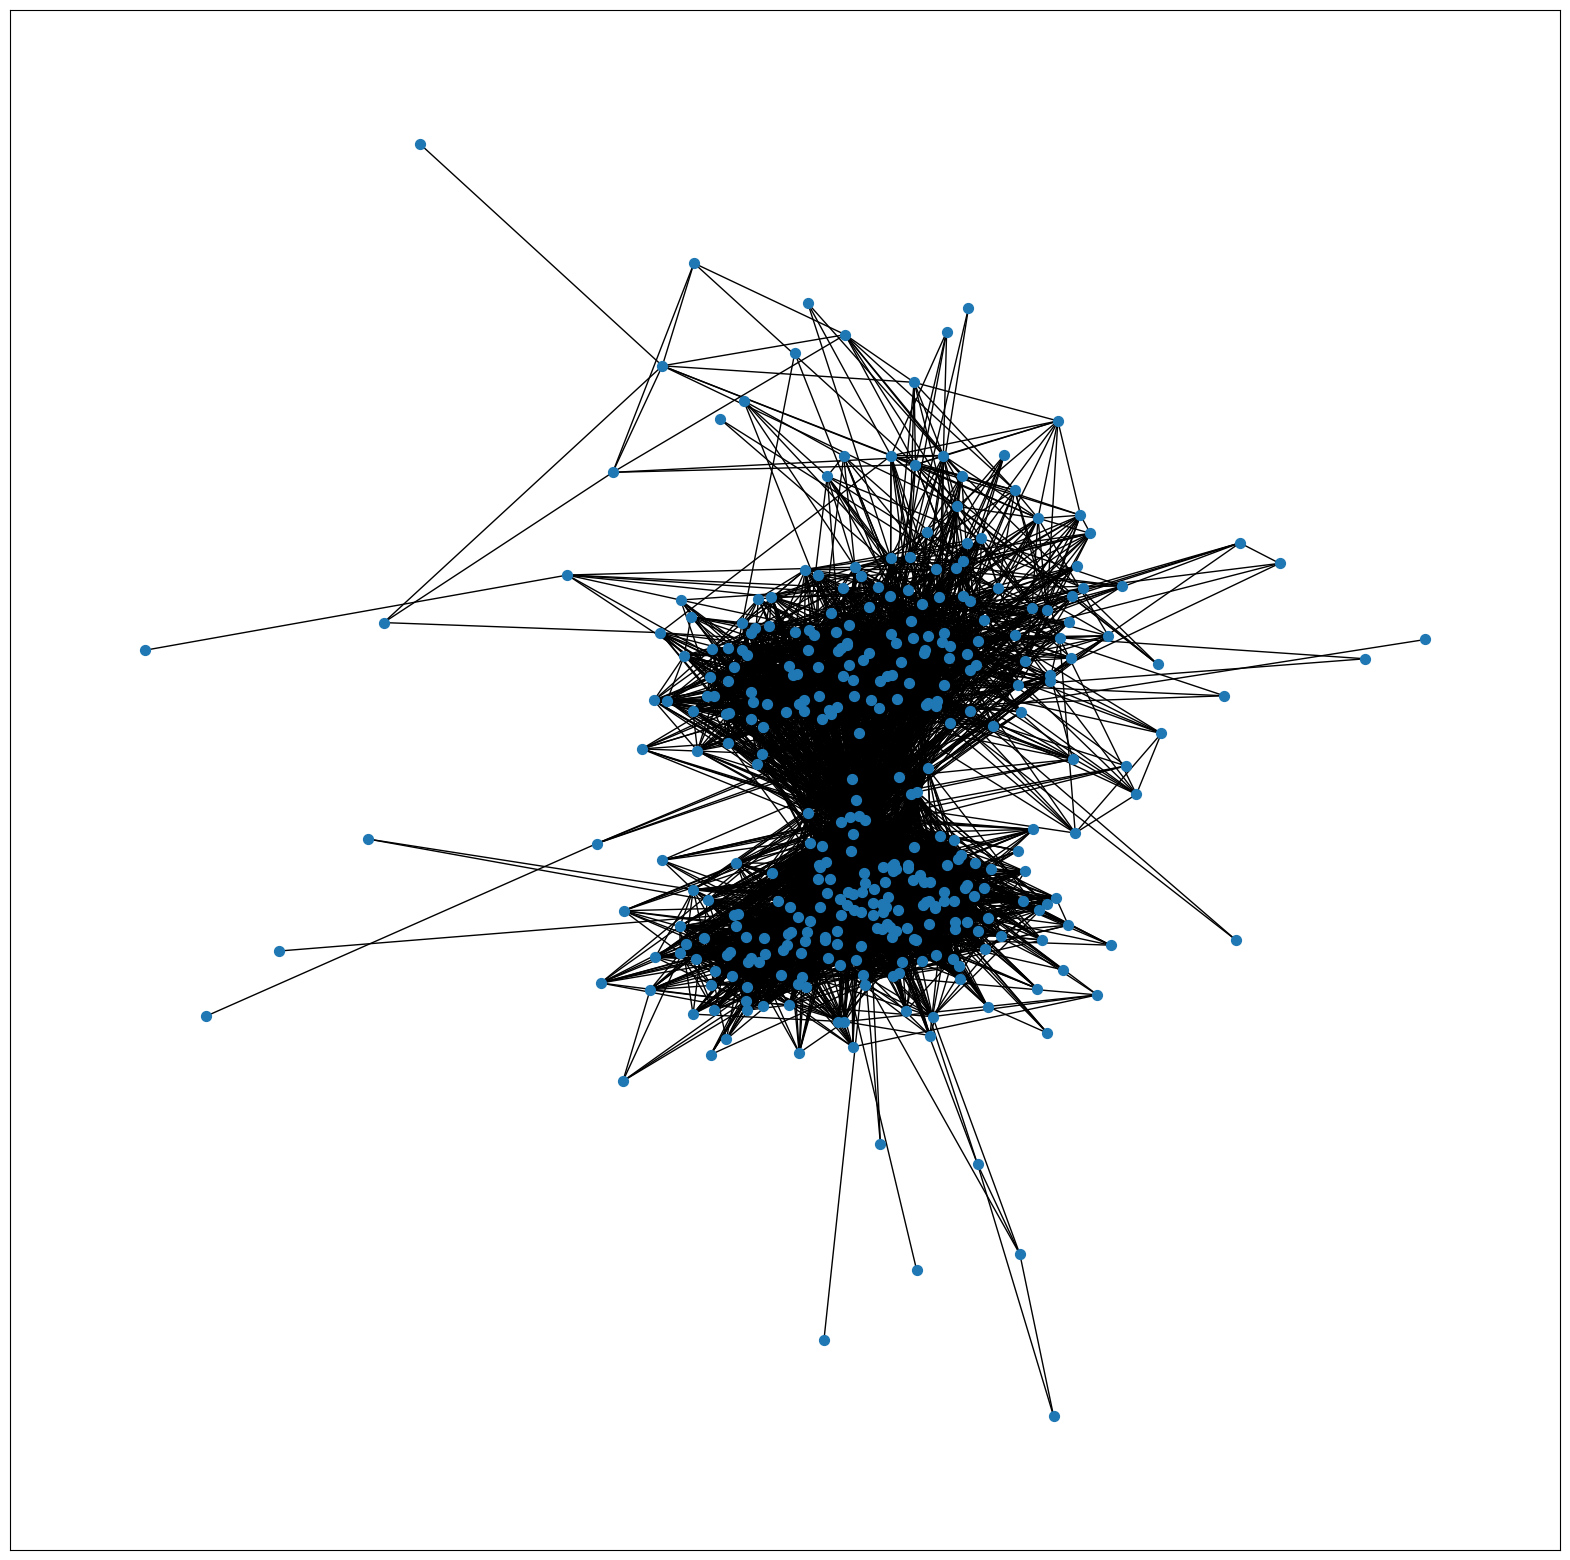

In [ ]:
fig,ax = plt.subplots(figsize=(20,20))
pos = nx.spring_layout(GRAPH,iterations=15)
nx.draw_networkx(GRAPH,pos,with_labels=False, node_size=50)


Average path length is a fundamental concept in network theory and graph analysis. It quantifies the average distance, in terms of edges or hops, between all pairs of nodes in a network. This metric provides insights into the overall connectivity and efficiency of information or resource transfer within the network.

In [ ]:
# Calculate average path length

avg_path_length = nx.average_shortest_path_length(GRAPH)
print("Average Path Length:", avg_path_length)

Average Path Length: 2.1367758073882164


The **diameter of a network** or graph is a fundamental metric in network analysis. It quantifies the longest shortest path between any two nodes in the network. In other words, it represents the maximum number of edges that must be traversed to travel from one node to another within the network. The diameter provides insights into the overall "reachability" or "distance" within a network.

In [ ]:
# Calculate diameter
diameter = nx.diameter(GRAPH)
print("Diameter:", diameter)

Diameter: 6


**Degree centrality** is a concept in network analysis that measures the importance of a node in a network based on the number of connections it has to other nodes

**Betweenness centrality** is a measure of a node's importance in a network based on its ability to act as a bridge or intermediary for the flow of information, influence, or resources between other nodes in the network


**Eigenvector centrality** is a measure of the importance of a node in a network based on the idea that connections to high-scoring nodes contribute more to a node's centrality. It is a concept in network analysis that quantifies a node's influence by taking into account not only the number of its connections but also the quality of its connections.


In [ ]:
# Degree Centrality
degree_centrality = nx.degree_centrality(GRAPH)

# Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(GRAPH)

# Eigenvector Centrality
eigenvector_centrality = nx.eigenvector_centrality(GRAPH)

print("Degree Centrality:", degree_centrality)
print()
print("Betweenness Centrality:", betweenness_centrality)
print()
print("Eigenvector Centrality:", eigenvector_centrality)


Degree Centrality: {375710523: 0.2185792349726776, 322687731: 0.1557377049180328, 273508691: 0.10109289617486339, 40981798: 0.7131147540983607, 371743964: 0.1830601092896175, 107701687: 0.13387978142076504, 164811132: 0.12021857923497267, 92319025: 0.2650273224043716, 306770757: 0.22404371584699453, 301730320: 0.10382513661202186, 440963134: 0.2185792349726776, 194939391: 0.1366120218579235, 178747246: 0.10382513661202186, 34428380: 0.674863387978142, 503275615: 0.08743169398907104, 476022252: 0.226775956284153, 337245056: 0.19398907103825136, 126128559: 0.1092896174863388, 173732041: 0.1830601092896175, 341566421: 0.1912568306010929, 463952369: 0.14207650273224043, 341756256: 0.1721311475409836, 394229278: 0.21584699453551912, 222868205: 0.2103825136612022, 401572852: 0.16393442622950818, 410381568: 0.14207650273224043, 152785073: 0.14754098360655737, 541586843: 0.16939890710382513, 22462180: 0.6994535519125683, 330560781: 0.21311475409836064, 152747316: 0.09016393442622951, 369283865

Community detection, also known as community identification or **clustering** in network analysis, is the process of **partitioning a network** or graph into groups of nodes (called communities or clusters) in such a way that nodes **within the same group are more densely connected to each other than they are to nodes in other groups.**



The **Girvan-Newman algorithm** is a **community detection algorithm** used in network analysis to identify communities or **clusters within a network**.


It is based on the concept of edge betweenness centrality, which measures the **number of shortest paths that pass through each edge in the network.**

 The algorithm iteratively removes edges with the highest betweenness centrality, gradually breaking the network into smaller and smaller communities.

In [ ]:
from networkx.algorithms.community import girvan_newman

In [ ]:
communities_generator = girvan_newman(GRAPH)

In [ ]:
node_groups = []

for community in next(communities_generator):
  node_groups.append(list(community))

print(node_groups)

[[220557335, 44312605, 325339173, 518101032, 312805417, 189251629, 221829166, 302280752, 513540148, 440963134, 392443970, 279777349, 202387543, 240982109, 503275615, 115222629, 82980971, 285972593, 217856118, 308844673, 40550544, 189898898, 187773078, 215785630, 17662117, 424548522, 70492333, 152785073, 196309171, 283711673, 320878786, 173732041, 188186842, 170565851, 103891164, 134301914, 211507422, 494852324, 160053476, 18086117, 256227563, 545020142, 453335289, 46209291, 214968599, 123715869, 198224160, 361142565, 340545830, 76106023, 272730406, 243851563, 179138862, 191924526, 181369136, 181299506, 96446770, 112939321, 385587514, 168220987, 213715260, 373909822, 85901645, 138760530, 273508691, 341756256, 204446054, 83943787, 223244654, 129571186, 382667125, 356190582, 282304891, 164811132, 315865471, 101204352, 335006084, 58528137, 479854996, 71827867, 181162395, 80929181, 247032236, 291305902, 126128559, 117674417, 72987063, 116498875, 298582473, 270959052, 143540685, 234047967, 2

In [ ]:
len(node_groups)

2

In [ ]:
color_map = []
for node in GRAPH:
    if node in node_groups[0]:
        color_map.append("red")
    else:
        color_map.append("green")



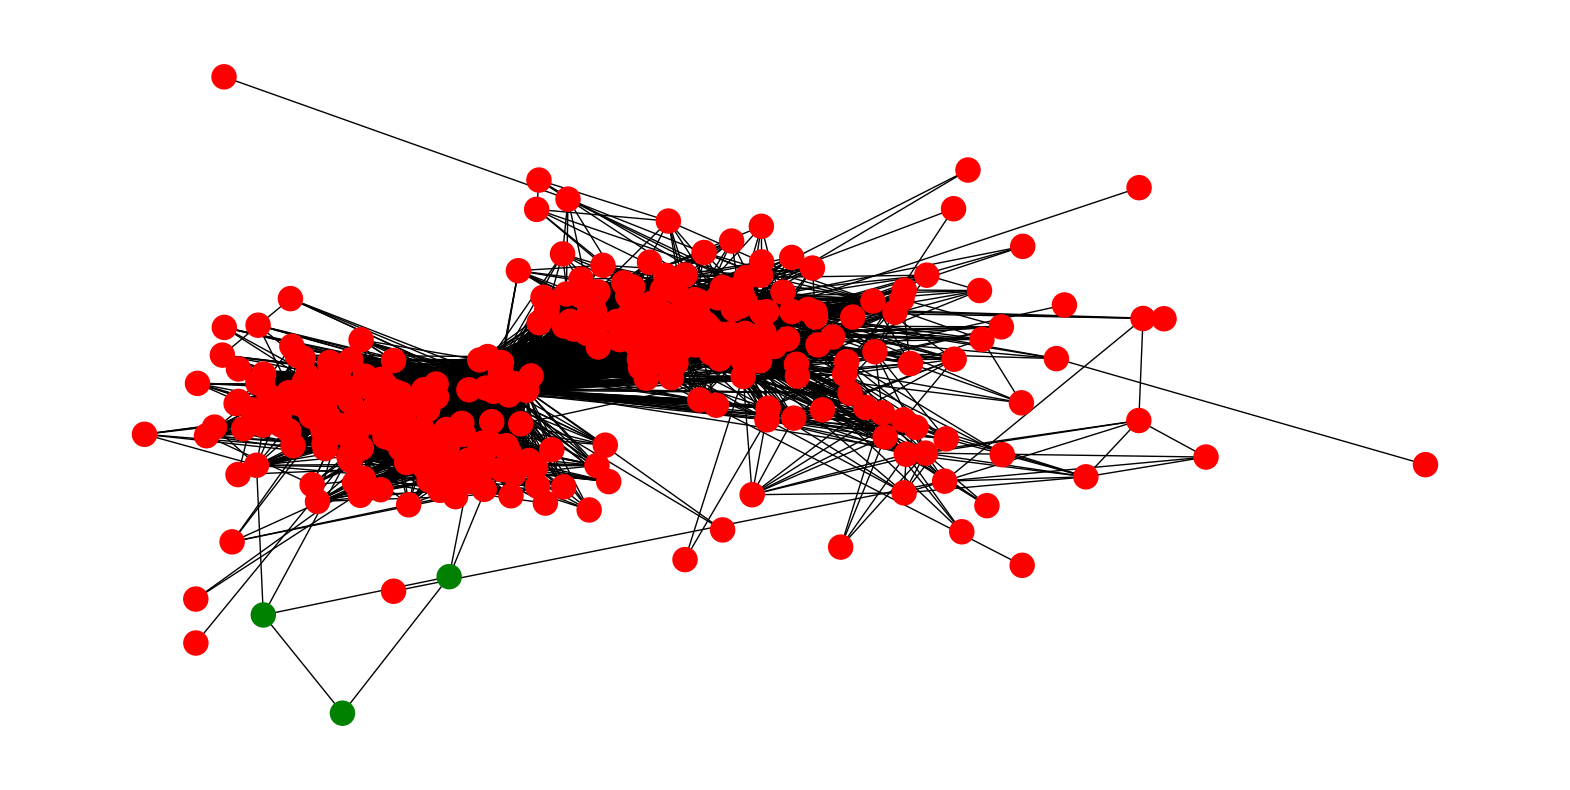

In [ ]:
fig,ax = plt.subplots(figsize=(20,10))
nx.draw(GRAPH ,pos, node_color=color_map, with_labels=False)
plt.show()

In [ ]:
# Use the Girvan-Newman algorithm for community detection
communities_generator = nx.community.girvan_newman(GRAPH)
top_level_communities = next(communities_generator)

# Get the number of communities
num_communities = len(top_level_communities)
print(f"Number of Communities: {num_communities}")

# Create a dictionary to store nodes in each community
community_nodes = {i: [] for i in range(num_communities)}
for comm_id, nodes in enumerate(top_level_communities):
    community_nodes[comm_id].extend(nodes)

# Print the nodes in each community
for community_id, nodes in community_nodes.items():
    print(f"Community {community_id}: {len(nodes)} nodes")
    print(nodes)
    print("-" * 30)

Number of Communities: 2
Community 0: 364 nodes
[220557335, 44312605, 325339173, 518101032, 312805417, 189251629, 221829166, 302280752, 513540148, 440963134, 392443970, 279777349, 202387543, 240982109, 503275615, 115222629, 82980971, 285972593, 217856118, 308844673, 40550544, 189898898, 187773078, 215785630, 17662117, 424548522, 70492333, 152785073, 196309171, 283711673, 320878786, 173732041, 188186842, 170565851, 103891164, 134301914, 211507422, 494852324, 160053476, 18086117, 256227563, 545020142, 453335289, 46209291, 214968599, 123715869, 198224160, 361142565, 340545830, 76106023, 272730406, 243851563, 179138862, 191924526, 181369136, 181299506, 96446770, 112939321, 385587514, 168220987, 213715260, 373909822, 85901645, 138760530, 273508691, 341756256, 204446054, 83943787, 223244654, 129571186, 382667125, 356190582, 282304891, 164811132, 315865471, 101204352, 335006084, 58528137, 479854996, 71827867, 181162395, 80929181, 247032236, 291305902, 126128559, 117674417, 72987063, 116498875